# Semantic Search on Bacteria Habitats via Entity Normalization

## Introduction

**Problem Definition:** Mapping queries and PubMed abstracts to habitat ontology for document retrieval.

**Approach:** Learning projection between documents and ontology spaces:
    - Pretrained word embeddings for document representation.
    - Graph embeddings on enriched ontology for ontology space.
    - Learning projection between two spaces.
    - Evaluation with shortest path distance.

## Graph Analytics

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [2]:
graph_path = './data/ontobiotope.gph'
enriched_graph_path = './data/enriched_ontobiotope.gph'
id_name_mapping_path = './data/ontobiotope_id_name_mapping.json'

In [3]:
graph = nx.read_edgelist(graph_path, data=False)
enriched_graph = nx.read_edgelist(enriched_graph_path, data=False)

In [4]:
with open(id_name_mapping_path) as f:
    id_name_mapping = json.load(f)

In [78]:
depths_graph = nx.shortest_path_length(graph, source='OBT:000000')
depth_of_tree_graph = max(depths_graph.values())
diameter_graph = nx.algorithms.distance_measures.diameter(graph)

depths_enriched_graph = nx.shortest_path_length(enriched_graph, source='OBT:000000')
depth_of_tree_enriched_graph = max(depths_enriched_graph.values())
diameter_enriched_graph = nx.algorithms.distance_measures.diameter(enriched_graph)

### Graph Statistics

|                | # Nodes | # Edges | Diameter | Max Dist to Root | Max Clique Size |
|:--------------:|:-------:|:-------:|:--------:|:----------------:|:---------------:|
| Taxonomy |   2320  |   2528  |    20    |        10        |        3        |
| Enriched Graph |   2320  |   3610  |    16    |        10        |        15       |

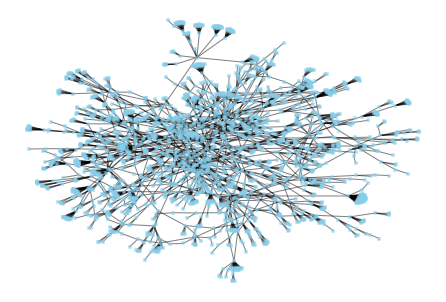

<Figure size 1152x576 with 0 Axes>

In [92]:
nx.spring_layout(graph)
nx.draw(graph, with_labels=False, node_size=2, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=2)
plt.figure(figsize=(16,8))
plt.draw()
#plt.savefig("graph.png", dpi=500, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1) 


### Clique Analysis

In [71]:
cliques_graph = list(nx.find_cliques(graph))
for c in cliques_graph:
    if len(c)>2:
        graph_cliques = [id_name_mapping[i] for i in c]

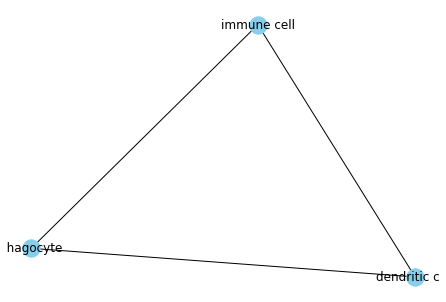

In [72]:
g = nx.Graph()
g.add_nodes_from(graph_cliques)

nx.spring_layout(nx.complete_graph(g))
nx.draw(nx.complete_graph(g), with_labels=True, node_color="skyblue")
plt.draw()

In [73]:
cliques_enriched_graph = list(nx.find_cliques(enriched_graph))
for c in cliques_enriched_graph:
    if len(c)>14:
        enriched_graph_cliques = [id_name_mapping[i] for i in c]

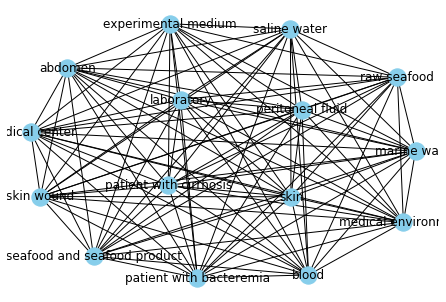

In [74]:
g = nx.Graph()
g.add_nodes_from(enriched_graph_cliques)

nx.spring_layout(nx.complete_graph(g))
nx.draw(nx.complete_graph(g), with_labels=True, node_color="skyblue")
plt.draw()

### Node Statistics

**Degree centrality:** Assign an importance score to the nodes according to the number of incoming and outgoing relationships from that node.

In [11]:
neighbors_graph_degree = [n for n in graph.neighbors('OBT:000001')]
list_neighbors_graph_degree = [id_name_mapping[n] for n in neighbors_graph_degree]
print(f'Number of neigbors of the node in the original graph with the highest degree: {len(list_neighbors_graph_degree)}')
print(list_neighbors_graph_degree, end=" ")

Number of neigbors of the node in the original graph with the highest degree: 12
['antibiotic-containing media', 'yeast extract', 'non-immune serum', 'bacteria habitat', 'biofilm reactor', 'cell culture', 'perchlorate-contaminated site', 'bovine serum', 'L-( null )-tartrate enriched soil', 'sterile water', 'agar', 'urea solution'] 

In [12]:
neighbors_enriched_graph_degree = [n for n in enriched_graph.neighbors('OBT:000001')]
list_neighbors_enriched_graph_degree = [id_name_mapping[n] for n in neighbors_enriched_graph_degree]
print(f'Number of neigbors of the node in the enriched graph with the highest degree: {len(list_neighbors_enriched_graph_degree)}')
print(list_neighbors_enriched_graph_degree, end=" ")

Number of neigbors of the node in the enriched graph with the highest degree: 73
['soybean', 'cell', 'antibiotic-containing media', 'yeast extract', 'non-immune serum', 'bacteria habitat', 'biofilm reactor', 'cell culture', 'perchlorate-contaminated site', 'bovine serum', 'L-( null )-tartrate enriched soil', 'sterile water', 'agar', 'urea solution', 'whole egg', 'egg and egg products', 'elderly patient', 'nursing home', 'medical center', 'patient', 'nose', 'nasal secretion', 'feces', 'rectal swab', 'apple', 'plant tissue', 'garden lettuce', 'frog', 'food for human', 'high salt concentration environment', 'apple juice', 'eye', 'biofilm', 'human', 'cornea', 'epithelium', 'artificial environment', 'jail', 'inmate', 'marine environment', 'Euprymna scolopes', 'light organ', 'young animal', 'yolk sac', 'urethra', 'secretion', 'urine', 'respiratory tract', 'child', 'healthy person', 'microflora', 'throat', 'nasopharynx', 'baby', 'welfare center', 'infant', 'clinic', 'pediatric patient', 'pati

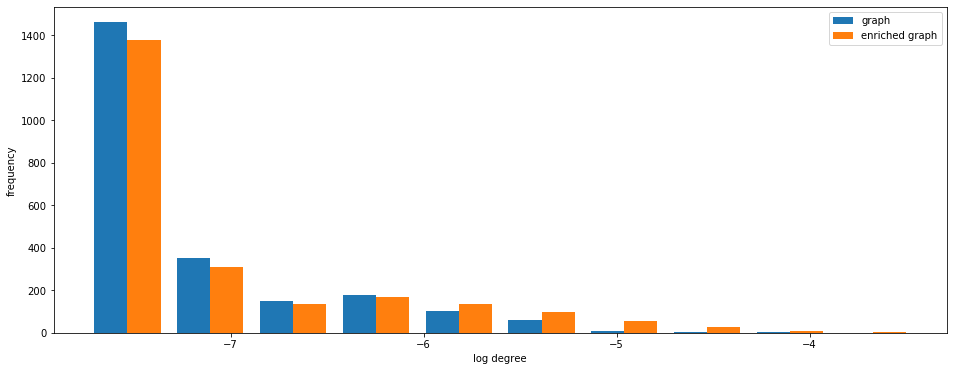

In [8]:
degree_centrality_graph = nx.degree_centrality(graph)
degree_centrality_enriched_graph = nx.degree_centrality(enriched_graph)

plt.figure(figsize=(16,6))
plt.hist([np.log(list(degree_centrality_graph.values())), np.log(list(degree_centrality_enriched_graph.values()))], label=['graph', 'enriched graph'])
plt.legend(loc='upper right')
plt.ylabel('frequency')
plt.xlabel('log degree')
plt.show()

In [9]:
df_graph_degree_centrality = pd.DataFrame(degree_centrality_graph.values(), index=degree_centrality_graph.keys()).sort_index()
df_graph_degree_centrality.columns=['degree_centrality']

df_enriched_graph_degree_centrality = pd.DataFrame(degree_centrality_enriched_graph.values(), index=degree_centrality_enriched_graph.keys()).sort_index()
df_enriched_graph_degree_centrality.columns=['degree_centrality']

In [111]:
df_diff_degree_centrality = (df_enriched_graph_degree_centrality - df_graph_degree_centrality)
a = nx.shortest_path_length(enriched_graph, source='OBT:000000')
df_diff_degree_centrality['dist_to_root'] = [a[node_id] for node_id in df_diff_degree_centrality.index]
df_diff_degree_centrality['name'] = [id_name_mapping[node_id] for node_id in df_diff_degree_centrality.index]

In [112]:
df_diff_degree_centrality.query('degree_centrality > 0').sort_values(by='degree_centrality', ascending=False).head(10)

,degree_centrality,dist_to_root,name
OBT:000001,0.026304,1,experimental medium
OBT:000316,0.022423,2,blood
OBT:000056,0.021992,2,cell
OBT:002216,0.020699,2,patient with infectious disease
OBT:001804,0.016818,2,human
OBT:000033,0.016386,2,microflora
OBT:002133,0.016386,2,patient
OBT:001423,0.011643,2,medical center
OBT:000571,0.010349,3,blood serum
OBT:002307,0.010349,2,pediatric patient


In [13]:
print(f'Difference of two graph: {set(list_neighbors_enriched_graph_degree)-set(list_neighbors_graph_degree)}')

Difference of two graph: {'skin wound', 'marine environment', 'patient with infectious disease', 'yolk sac', 'food for human', 'epithelium', 'skin', 'elderly patient', 'patient', 'cornea', 'baby', 'child', 'frog', 'nasal secretion', 'medical center', 'human', 'laboratory', 'plant tissue', 'microflora', 'pediatric patient', 'abdomen', 'egg and egg products', 'nasopharynx', 'peritoneal fluid', 'Euprymna scolopes', 'young animal', 'feces', 'seafood and seafood product', 'nursing home', 'throat', 'eye', 'apple', 'blood', 'pharynx', 'medical environment', 'raw seafood', 'apple juice', 'respiratory tract', 'nose', 'marine water', 'rectal swab', 'light organ', 'soybean', 'inmate', 'artificial environment', 'saline water', 'urine', 'cell', 'garden lettuce', 'jail', 'patient with bacteremia', 'urethra', 'infant', 'patient with cirrhosis', 'healthy person', 'high salt concentration environment', 'secretion', 'welfare center', 'whole egg', 'biofilm', 'clinic'}


**Eigencentrality:** Measures the importance of a node based on its neighbors.

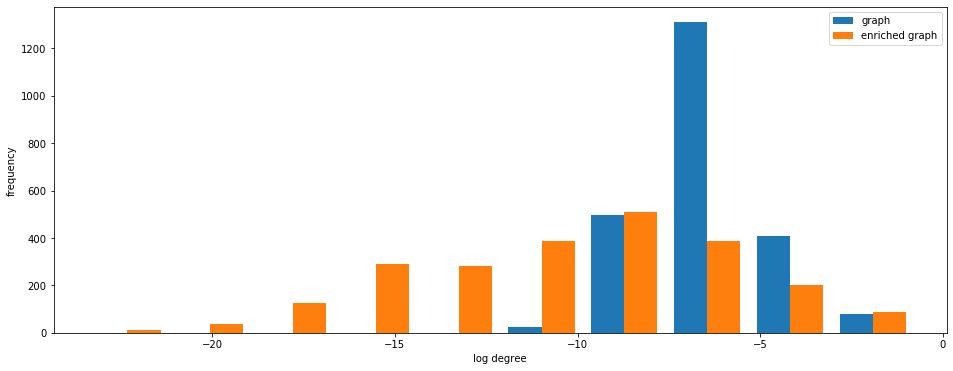

In [14]:
eigen_centrality_graph = nx.eigenvector_centrality(graph, tol=1e-03)
eigen_centrality_enriched_graph = nx.eigenvector_centrality(enriched_graph)

plt.figure(figsize=(16,6))
plt.hist([np.log(list(eigen_centrality_graph.values())), np.log(list(eigen_centrality_enriched_graph.values()))], label=['graph', 'enriched graph'])
plt.legend(loc='upper right')
plt.ylabel('frequency')
plt.xlabel('log degree')
plt.show()

In [15]:
df_graph_eigen_centrality = pd.DataFrame(eigen_centrality_graph.values(), index=eigen_centrality_graph.keys()).sort_index()
df_graph_eigen_centrality.columns=['eigen_centrality']

df_enriched_graph_eigen_centrality = pd.DataFrame(eigen_centrality_enriched_graph.values(), index=eigen_centrality_enriched_graph.keys()).sort_index()
df_enriched_graph_eigen_centrality.columns=['eigen_centrality']

In [116]:
df_diff_eigen_centrality = (df_graph_eigen_centrality - df_enriched_graph_eigen_centrality).abs()
a = nx.shortest_path_length(enriched_graph, source='OBT:000000')
df_diff_eigen_centrality['dist_to_root'] = [a[node_id] for node_id in df_diff_eigen_centrality.index]
df_diff_eigen_centrality['name'] = [id_name_mapping[node_id] for node_id in df_diff_eigen_centrality.index]
df_diff_eigen_centrality.query('eigen_centrality > 0').sort_values(by='eigen_centrality', ascending=False).head(10)

,eigen_centrality,dist_to_root,name
OBT:001224,0.386366,3,fish meat and fish meat product
OBT:000065,0.367280,2,animal part
OBT:000001,0.273912,1,experimental medium
OBT:002216,0.244633,2,patient with infectious disease
OBT:000316,0.193960,2,blood
OBT:002133,0.192783,2,patient
OBT:000033,0.167563,2,microflora
OBT:001423,0.155234,2,medical center
OBT:001804,0.153099,2,human
OBT:002146,0.148559,2,child


In [17]:
neighbors_graph_eigen = [n for n in graph.neighbors('OBT:001224')]
list_neighbors_graph_eigen = [id_name_mapping[n] for n in neighbors_graph_eigen]
print(f'Number of neigbors of the node in the original graph with the highest eigen degree: {len(list_neighbors_graph_eigen)}')
print(list_neighbors_graph_eigen, end=" ")

Number of neigbors of the node in the original graph with the highest eigen degree: 43
['meat and meat product', 'cooked fish', 'catfish meat', 'madraine fish meat', 'wuchang bream meat', 'freshwater bream meat', 'buegill sunfish meat', 'roache meat', 'tilapia meat', 'carp meat', 'weatherfish meat', 'barb meat', 'wild fish meat', 'farmed fish meat', 'mackerel meat', 'shark meat', 'barracuda meat', 'ray meat', 'paddle fish meat', 'eel meat', 'sturgeon meat', 'perch meat', 'cod meat', 'trout meat', 'sardine meat', 'anchovie meat', 'wolffish meat', 'anglerfish meat', 'bonito meat', 'dolphinfish meat', 'herring emat', 'tuna meat', 'emperor meat', 'mullet meat', 'whitefish meat', 'shad meat', 'flouder meat', 'halibut meat', 'sole meat', 'turbot meat', 'haddock meat', 'hake meat', 'smelt meat'] 

In [18]:
neighbors_enriched_graph_eigen = [n for n in enriched_graph.neighbors('OBT:001224')]
list_neighbors_enriched_graph_eigen = [id_name_mapping[n] for n in neighbors_enriched_graph_eigen]
print(f'Number of neigbors of the node in the enriched graph with the highest eigen degree: {len(list_neighbors_enriched_graph_eigen)}')
print(list_neighbors_enriched_graph_eigen, end=" ")

Number of neigbors of the node in the enriched graph with the highest eigen degree: 57
['microflora', 'food processing factory', 'garden vegetable and primary derivative thereof', 'dried food', 'agricultural product', 'additive', 'pesticide', 'meat and meat product', 'poultry meat', 'food for human', 'water', 'fruit', 'cooked fish', 'catfish meat', 'madraine fish meat', 'wuchang bream meat', 'freshwater bream meat', 'buegill sunfish meat', 'roache meat', 'tilapia meat', 'carp meat', 'weatherfish meat', 'barb meat', 'wild fish meat', 'farmed fish meat', 'mackerel meat', 'shark meat', 'barracuda meat', 'ray meat', 'paddle fish meat', 'eel meat', 'sturgeon meat', 'perch meat', 'cod meat', 'trout meat', 'sardine meat', 'anchovie meat', 'wolffish meat', 'anglerfish meat', 'bonito meat', 'dolphinfish meat', 'herring emat', 'tuna meat', 'emperor meat', 'mullet meat', 'whitefish meat', 'shad meat', 'flouder meat', 'halibut meat', 'sole meat', 'turbot meat', 'haddock meat', 'hake meat', 'smelt 

In [19]:
print(f'Difference of two graph: {set(list_neighbors_enriched_graph_eigen)-set(list_neighbors_graph_eigen)}')

Difference of two graph: {'sugar', 'additive', 'agricultural product', 'food processing factory', 'garden vegetable and primary derivative thereof', 'mammal meat', 'whole egg', 'pesticide', 'water', 'dried food', 'food for human', 'poultry meat', 'fruit', 'microflora'}


## Future Work

- Code refectoring
- Integrating rule based matching
- Model hyper-parameter tuning
- Adding text features to nodes
- Inverted index construction
- Semantic search